这个教程中大部分时间都是使用pandas.read_csv来读取数据，所以了解pytohn如何处理文件是很重要的。

用内建的open函数能打开、读取、写入一个文件，要给open一个相对路径或绝对路径：

In [3]:
path = '../../examples/segismundo.txt'

上面的`..`表示返回上一个层级

In [4]:
f = open(path)

In [5]:
for line in f:
    pass

文件中的每一个line都是有end-of-line（EOL），行终结标志的，所以我们经常用下面的方法读到没有行终结标志的list of line：

In [6]:
lines = [x.rstrip() for x in open(path)]

In [7]:
lines

['Sueña el rico en su riqueza,',
 'que más cuidados le ofrece;',
 '',
 'sueña el pobre que padece',
 'su miseria y su pobreza;',
 '',
 'sueña el que a medrar empieza,',
 'sueña el que afana y pretende,',
 'sueña el que agravia y ofende,',
 '',
 'y en el mundo, en conclusión,',
 'todos sueñan lo que son,',
 'aunque ninguno lo entiende.',
 '']

当我们open文件后，一定要记得在结束后close文件，这样就不会占用操作系统的资源了：

In [8]:
f.close()

另一种方法可以在运行结束后自动关闭文件，用with语句。其实这样的用法更常见，推荐用with：

In [10]:
with open(path) as f:
    lines = [x.rstrip() for x in f]

如果我们输入`f = open(path, 'w')`，那么会在`../examples/`下创建一个新的segismundo.txt文件，如果有同名文件的话会被覆盖。w就表示写入的意思。

即打开文件的同时就规定好我们是以哪种模式打开的，下面就是一些有效的打开模式：

模式 | 描述
---- | ---
r | 单一读取模式
w | 单一写入模式；创建一个新文件（消除同名文件的数据）
x | 单一写入模式；创建一个新文件，但如果path已经存在的话会失败
a | 添加内容到已经存在的文件里（如果文件不存在的话创建新文件）
r+ | 读取和写入双模式
b | 针对二进制文件的模式（'rb': 或 'wb'）
t | 文本模式（自动编码bytes为Unicode）。如果不明说的话默认就是这种模式。添加t到其他模式后面（'rt' or 'xt'）

这里有一张表格会更全一些：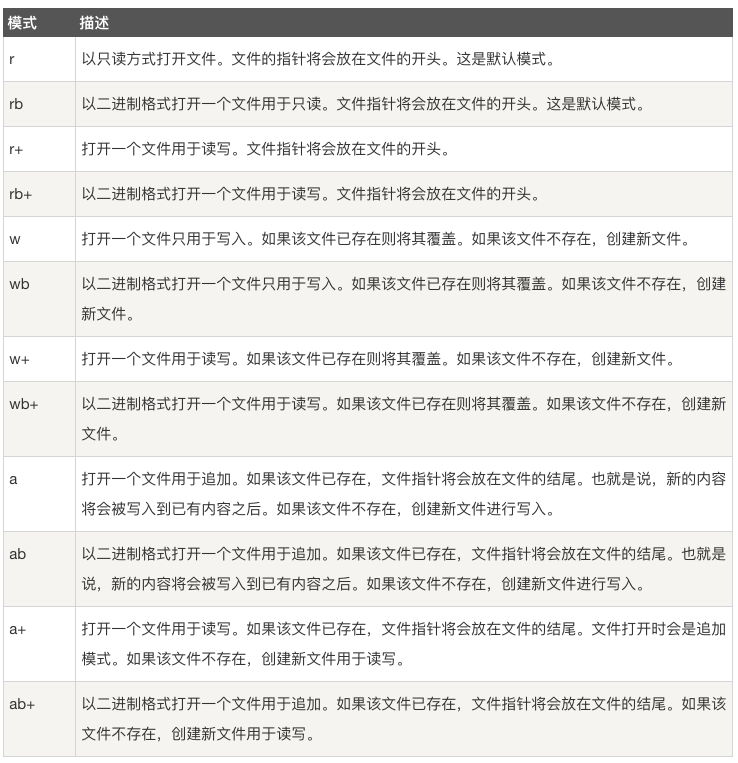



想要写文本到文件里的话，用file的write或writelines方法。比如，我们想给prof_mod.py写一个没有空白行的版本：

In [13]:
with open('../../examples/tmp.txt', 'w') as handle:
    handle.writelines(x for x in open(path) if len(x) > 1)

In [11]:
with open('../../examples/tmp.txt') as f:
    lines = f.readlines()
lines

['Sueña el rico en su riqueza,\n',
 'que más cuidados le ofrece;\n',
 'sueña el pobre que padece\n',
 'su miseria y su pobreza;\n',
 'sueña el que a medrar empieza,\n',
 'sueña el que afana y pretende,\n',
 'sueña el que agravia y ofende,\n',
 'y en el mundo, en conclusión,\n',
 'todos sueñan lo que son,\n',
 'aunque ninguno lo entiende.\n']

下面的方法，有需要再去看吧：
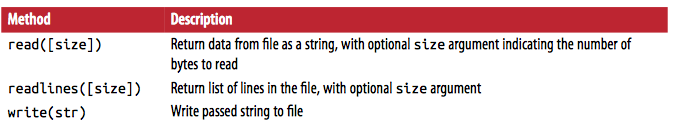
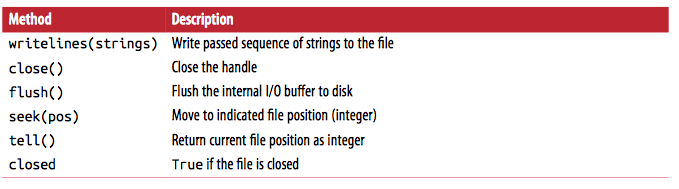

# Bytes and Unicode with Files

不论是读取还是写入，默认的python文件都是 text mode（文本模式），意味着你是与python string（i.e., Unicode）打交道。这和binary mode（二进制模式）形成了对比。这里举个栗子（下面的文件包含non-ASCII字符，用UTF-8编码）：

In [12]:
with open(path) as f:
    chars = f.read(10)

In [13]:
chars

'Sueña el r'

UTF-8是一种长度可变的Unicode编码，所以我们想要从文件中读取一定数量的字符时，python会读取足够的bytes（可能从10到40）然后解码城我们要求数量的字符。而如果我们用'rb'模式的话，read只会读取相应的bytes数量：

In [14]:
with open(path, 'rb') as f:
    data = f.read(10)

In [15]:
data

b'Sue\xc3\xb1a el '

取决于文本的编码，你能够把bytes解码为str，不过如果编码的Unicode字符不完整的话，是无法解码的：

In [16]:
data.decode('utf8')

'Sueña el '

In [17]:
data[:4].decode('utf8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 3: unexpected end of data

在使用open的时候，文本模式是有一个编码选项的，这能更方便我们把一种Unicode编码变为另一种：

In [18]:
sink_path = '../../examples/sink.txt'

In [19]:
with open(path) as source:
    with open(sink_path, 'xt', encoding='iso-8859-1') as sink:
        sink.write(source.read())
# 需要删除文件，否则会报错文件已经存在

FileExistsError: [Errno 17] File exists: '../../examples/sink.txt'

In [20]:
with open(sink_path, encoding='iso-8859-1') as f:
    print(f.read(10))

Sueña el r


注意：在任何模式下使用seek打开文件都可以，除了二进制模式。如果文件的指针落在bytes（Unicode编码）的中部，那么之后使用read会报错：

In [21]:
f = open(path)

In [22]:
f.read(5)

'Sueña'

In [23]:
f.seek(4)

4

In [24]:
f.read(1)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 0: invalid start byte

In [25]:
f.close()

如果我们在做数据分析时，经常使用non-ASCII文本数据的话，掌握python的Unicode功能是很有用的。

关于字符串和编码，这里推荐一篇文章，写的非常详细：[字符串，那些你不知道的事](http://liujiacai.net/blog/2015/11/20/strings/)